<a href="https://colab.research.google.com/github/VictorGalo44/Model-Validation-and-Evaluation-Metrics/blob/main/Victor_Diniz_Pessoa_C%C3%B3pia_de_Valida%C3%A7ao_e_m%C3%A9tricas_de_avalia%C3%A7%C3%A3o_aulaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Análise Exploratória e Pré-processamento</h1>

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/VictorGalo44/Model-Validation-and-Evaluation-Metrics/refs/heads/main/emp_automovel.csv'
data = pd.read_csv(url)
data

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [2]:
data.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [3]:
data.describe()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
count,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000
mean,17410.722321,2779.063672,12.147035,0.278075,2.022922,0.490915,0.522771,0.512252,0.117734,975.491009,0.087293
std,9658.762569,1305.364734,7.452120,0.448055,0.498807,0.142389,0.875945,0.062725,0.076180,818.141709,0.282266
min,2700.000000,218.700000,0.000000,0.000000,1.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000
25%,11700.000000,2002.500000,12.157324,0.000000,2.000000,0.492810,0.407054,0.513171,0.091800,302.000000,0.000000
50%,16855.246324,2722.188351,12.157324,0.000000,2.000000,0.501213,0.554789,0.513171,0.117428,810.000000,0.000000
75%,20250.000000,3199.500000,12.157324,1.000000,2.000000,0.501213,0.659141,0.513171,0.117428,1563.000000,0.000000
max,450000.000000,22500.000000,69.000000,1.000000,3.000000,0.942680,100.000000,0.869211,1.000000,4185.000000,1.000000


In [4]:
import plotly.express as px
px.box(data, x="receita_cliente", color = "inadimplente")

In [5]:
px.box(data, x="anuidade_emprestimo", color = "inadimplente")

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [6]:
#criar um modelo de arvore
x=data.drop('inadimplente',axis=1)
y=data['inadimplente']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
SEED=5
x_treino , x_teste , y_treino , y_teste  = train_test_split(x,y, test_size=0.2 , stratify=y, random_state=5)
tree = DecisionTreeClassifier(max_depth=10 , random_state=5)
modelo= tree.fit(x_treino, y_treino)
print(modelo.score(x_teste, y_teste))

0.907357704766312


### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

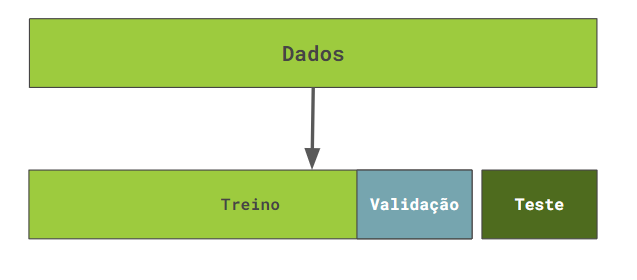

In [8]:
x_treino , x_teste , y_treino , y_teste  = train_test_split(x,y, test_size=0.15 , stratify=y, random_state=5)
x_treinoP , x_val, y_treinoP , y_val = train_test_split(x_treino,y_treino, test_size=0.15 , stratify=y_treino, random_state=5)

In [9]:
tree = DecisionTreeClassifier(max_depth=10 , random_state=5)
modelo= tree.fit(x_treinoP, y_treinoP)
print(modelo.score(x_val, y_val))

0.9060821599651618


### Avaliando o modelo

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
y_pred=modelo.predict(x_val)  #y_val=reais
matrix=confusion_matrix(y_val,y_pred)
print(matrix)

[[6228   60]
 [ 587   14]]


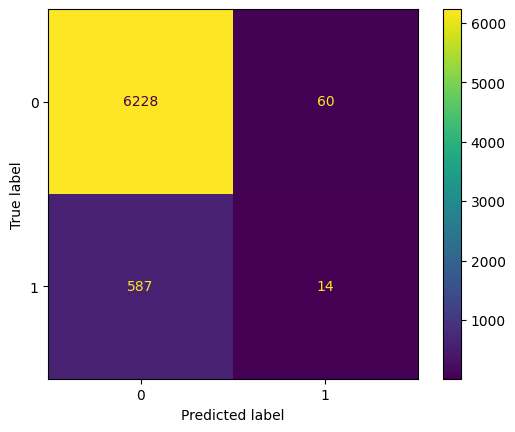

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
grafico_matriz= ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modelo.classes_)
grafico_matriz.plot()


## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

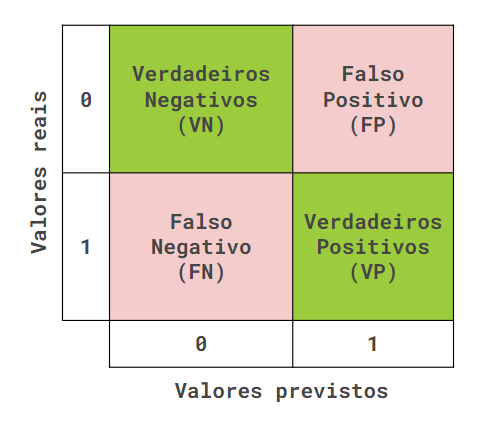

#### Acurácia


É a métrica mais comum e básica em problemas de classificação. É utilizada para medir a proporção de dados previstos corretamente pelo modelo em relação ao total dos dados. Essa métrica é útil quando as classes da variável alvo estão balanceadas, ou seja, quando existe uma quantidade equilibrada de dados para cada classe e uma importância equivalente de classificação entre as categorias. Como exemplo de utilização, temos o reconhecimento de dígitos manuscritos. Podemos utilizar imagens de caracteres de letras e números para treinar um modelo de classificação para identificar corretamente a escrita. Como cada letra ou número não tem uma importância maior do que as demais, a acurácia se torna uma boa métrica para medir a capacidade do modelo em classificar corretamente os dígitos.

Abaixo, podemos analisar o cálculo da acurácia a partir da matriz de confusão. Ela é calculada somando os acertos do modelo (VN + VP) e dividindo por todos os acertos e erros (VP+VN+FP+FN).

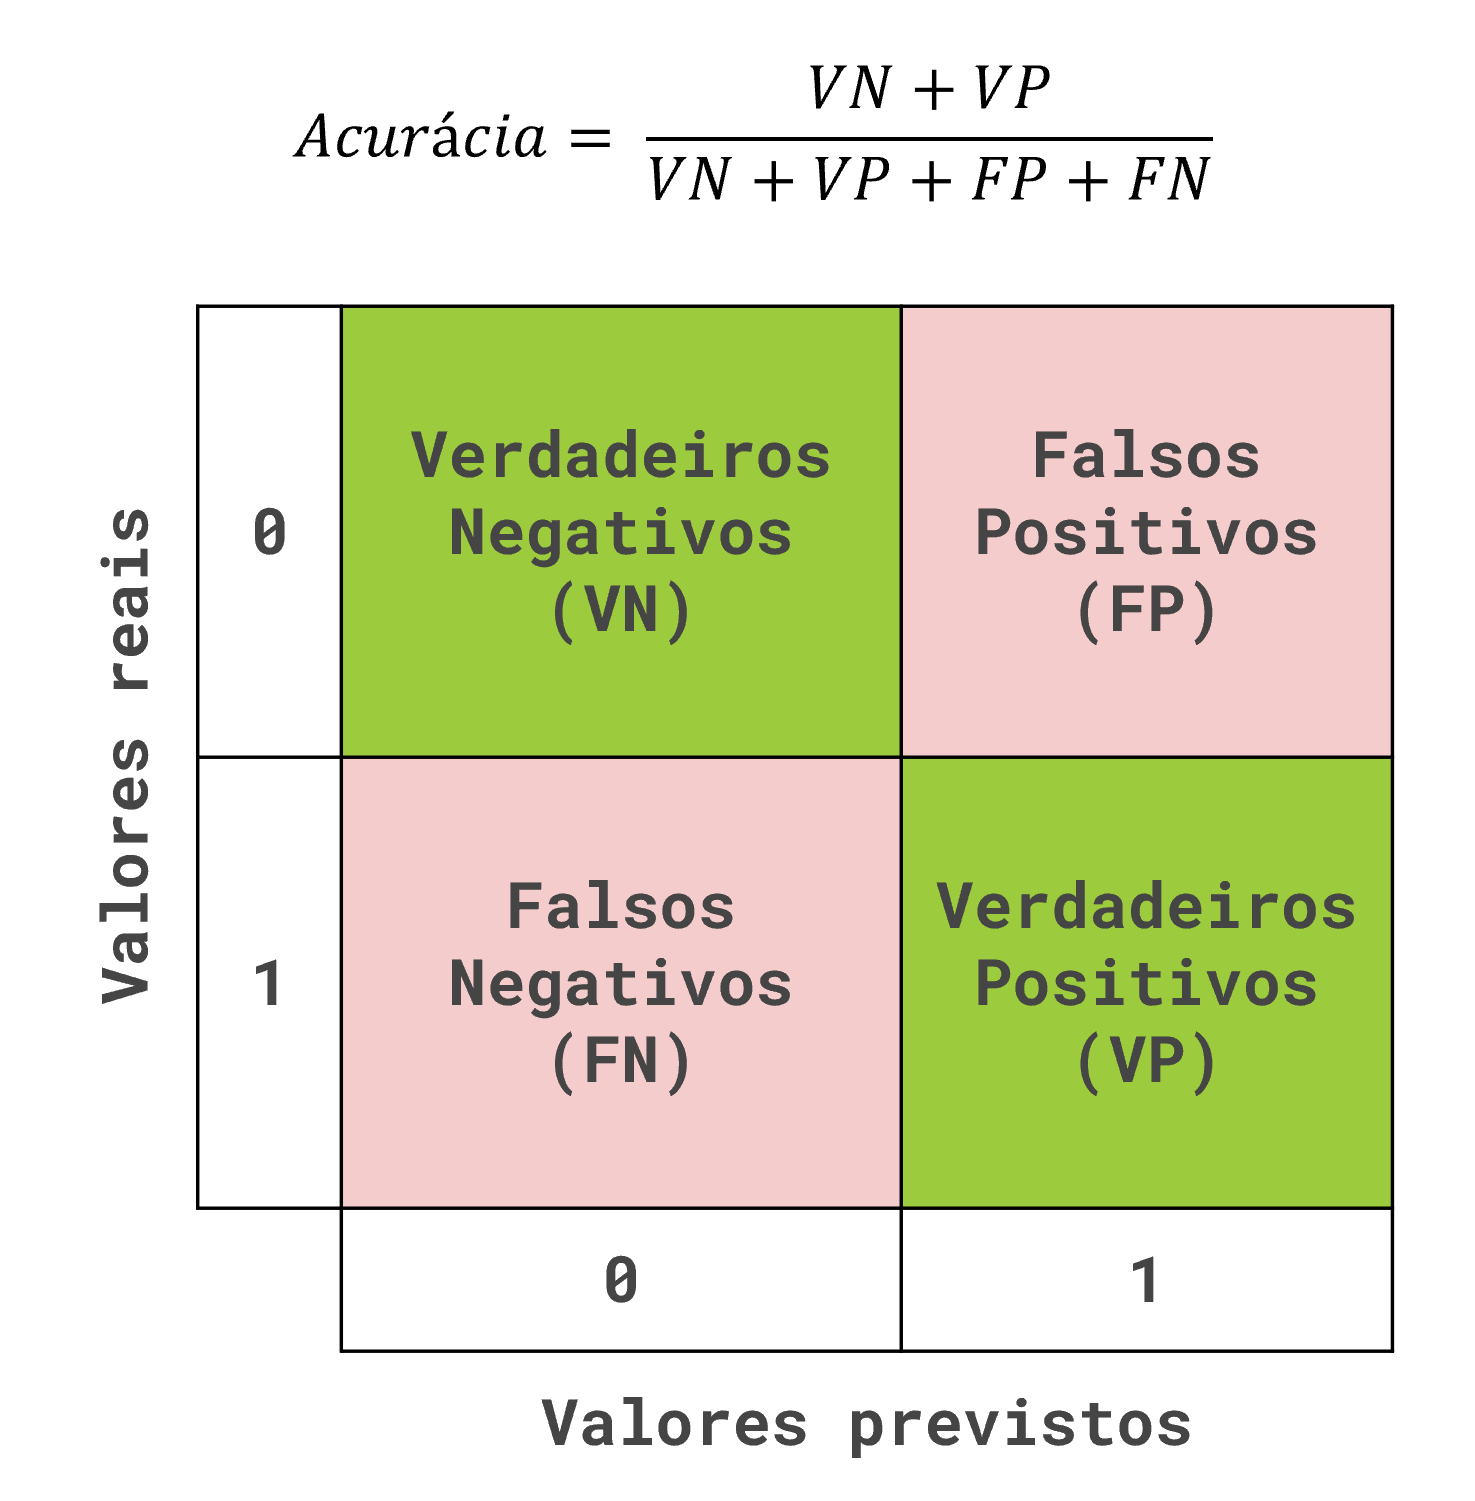

##Revocação (recall)
Mede a proporção de dados positivos que foram corretamente identificados pelo modelo, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados positivos como negativos. É usada quando o risco ou custo de classificar falsos negativos é alto. Por exemplo, em casos de diagnóstico de doenças graves, em que é fundamental detectar corretamente a presença da doença.

Abaixo podemos constatar o cálculo do recall a partir da matriz de confusão. O recall só leva em consideração os valores positivos reais, ou seja, os valores da segunda linha da matriz. Ele é calculado a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos reais (VP + FN):

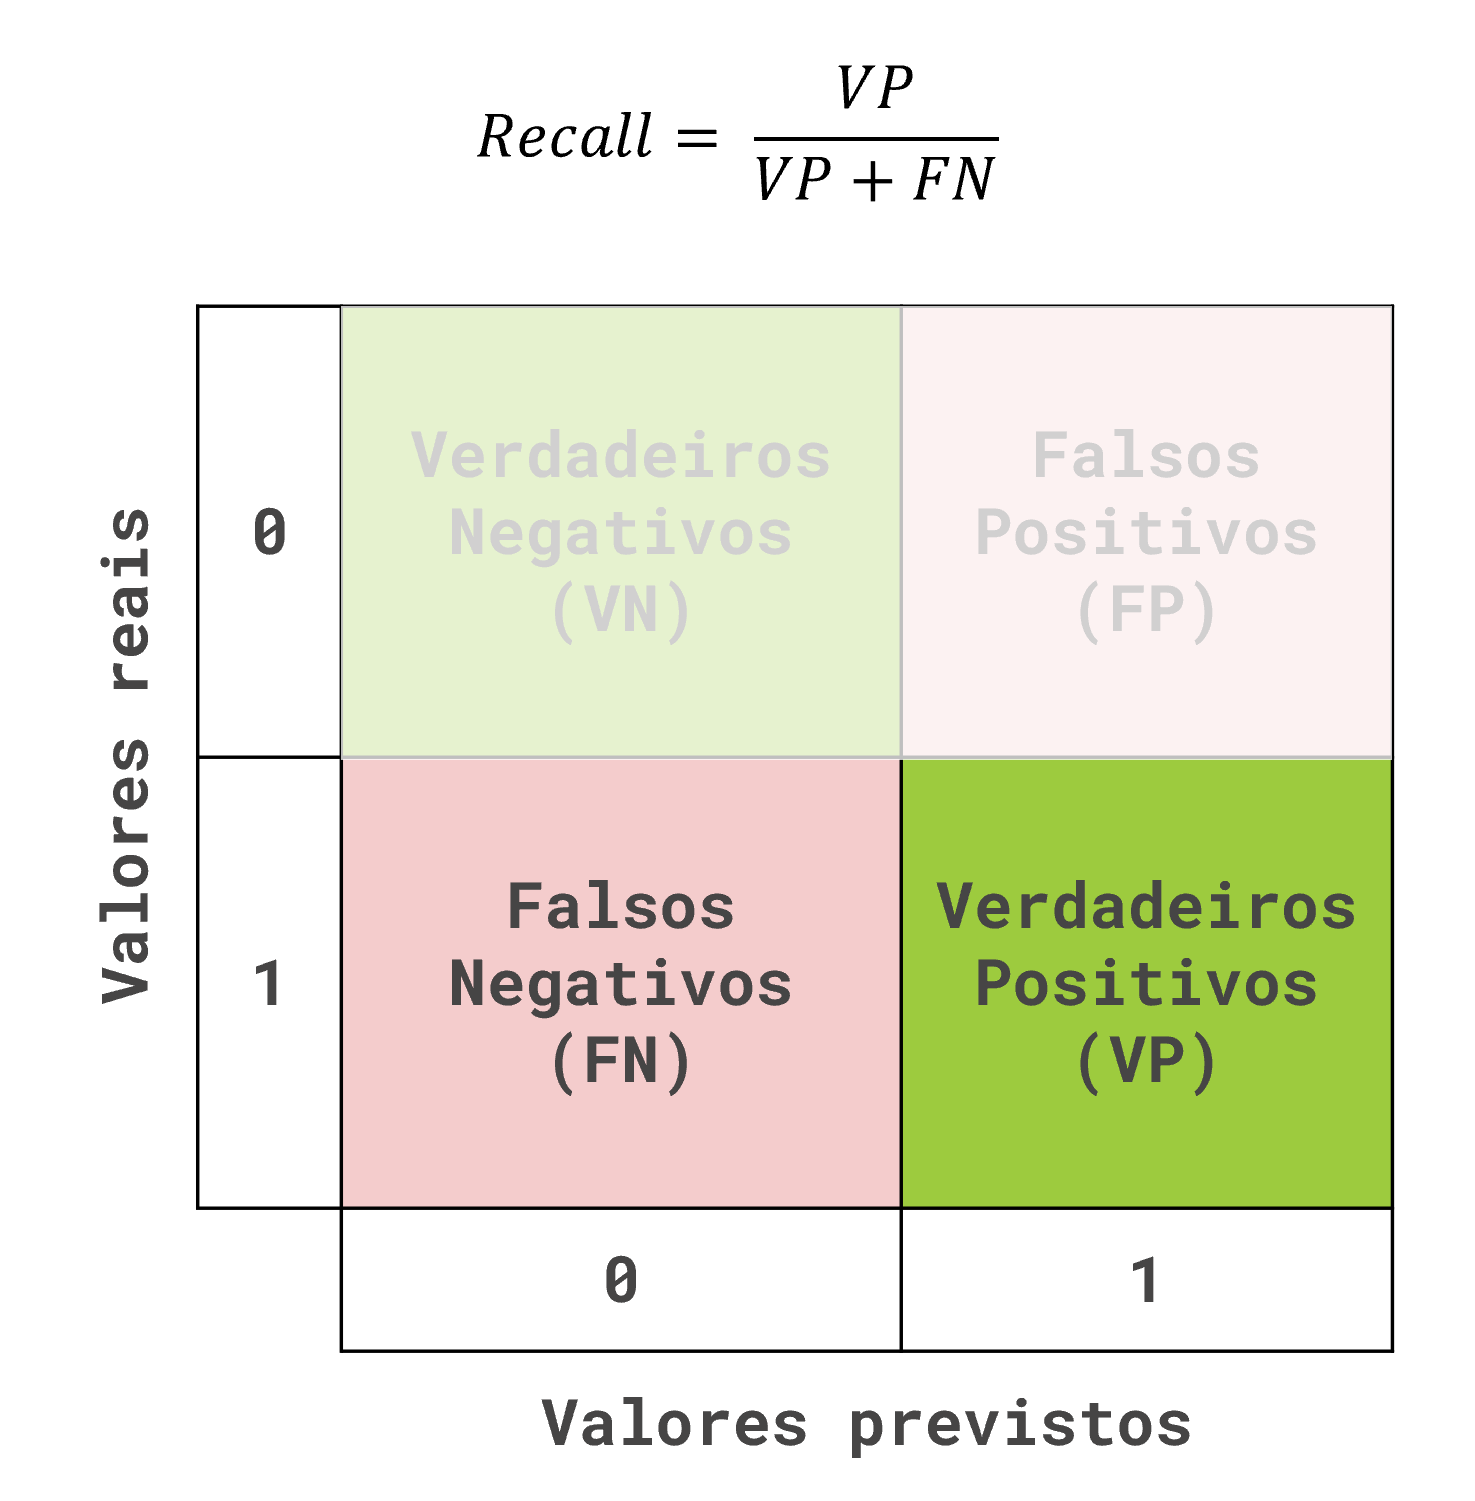




#### Precisão


Mede a proporção de dados classificados como positivos que são realmente positivos, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados negativos como positivos. É usada quando o risco ou custo de classificar falsos positivos é alto, por exemplo em casos de seleção de ações no mercado financeiro, onde o importante é selecionar ações que tenham grande probabilidade de retorno, abaixando a quantidade de ações ruins (falsos positivos) mesmo que outras boas ações não tenham sido detectadas pelo modelo (falso negativo). A precisão também é importante no exemplo de detecção de doenças, onde queremos evitar que pacientes saudáveis sejam erroneamente classificados como doentes.

Abaixo podemos analisar o cálculo da precisão a partir da matriz de confusão. A precisão só leva em consideração os valores positivos previstos pelo modelo, ou seja, os valores da segunda coluna da matriz. Ela é calculada a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos previstos (VP + FP):

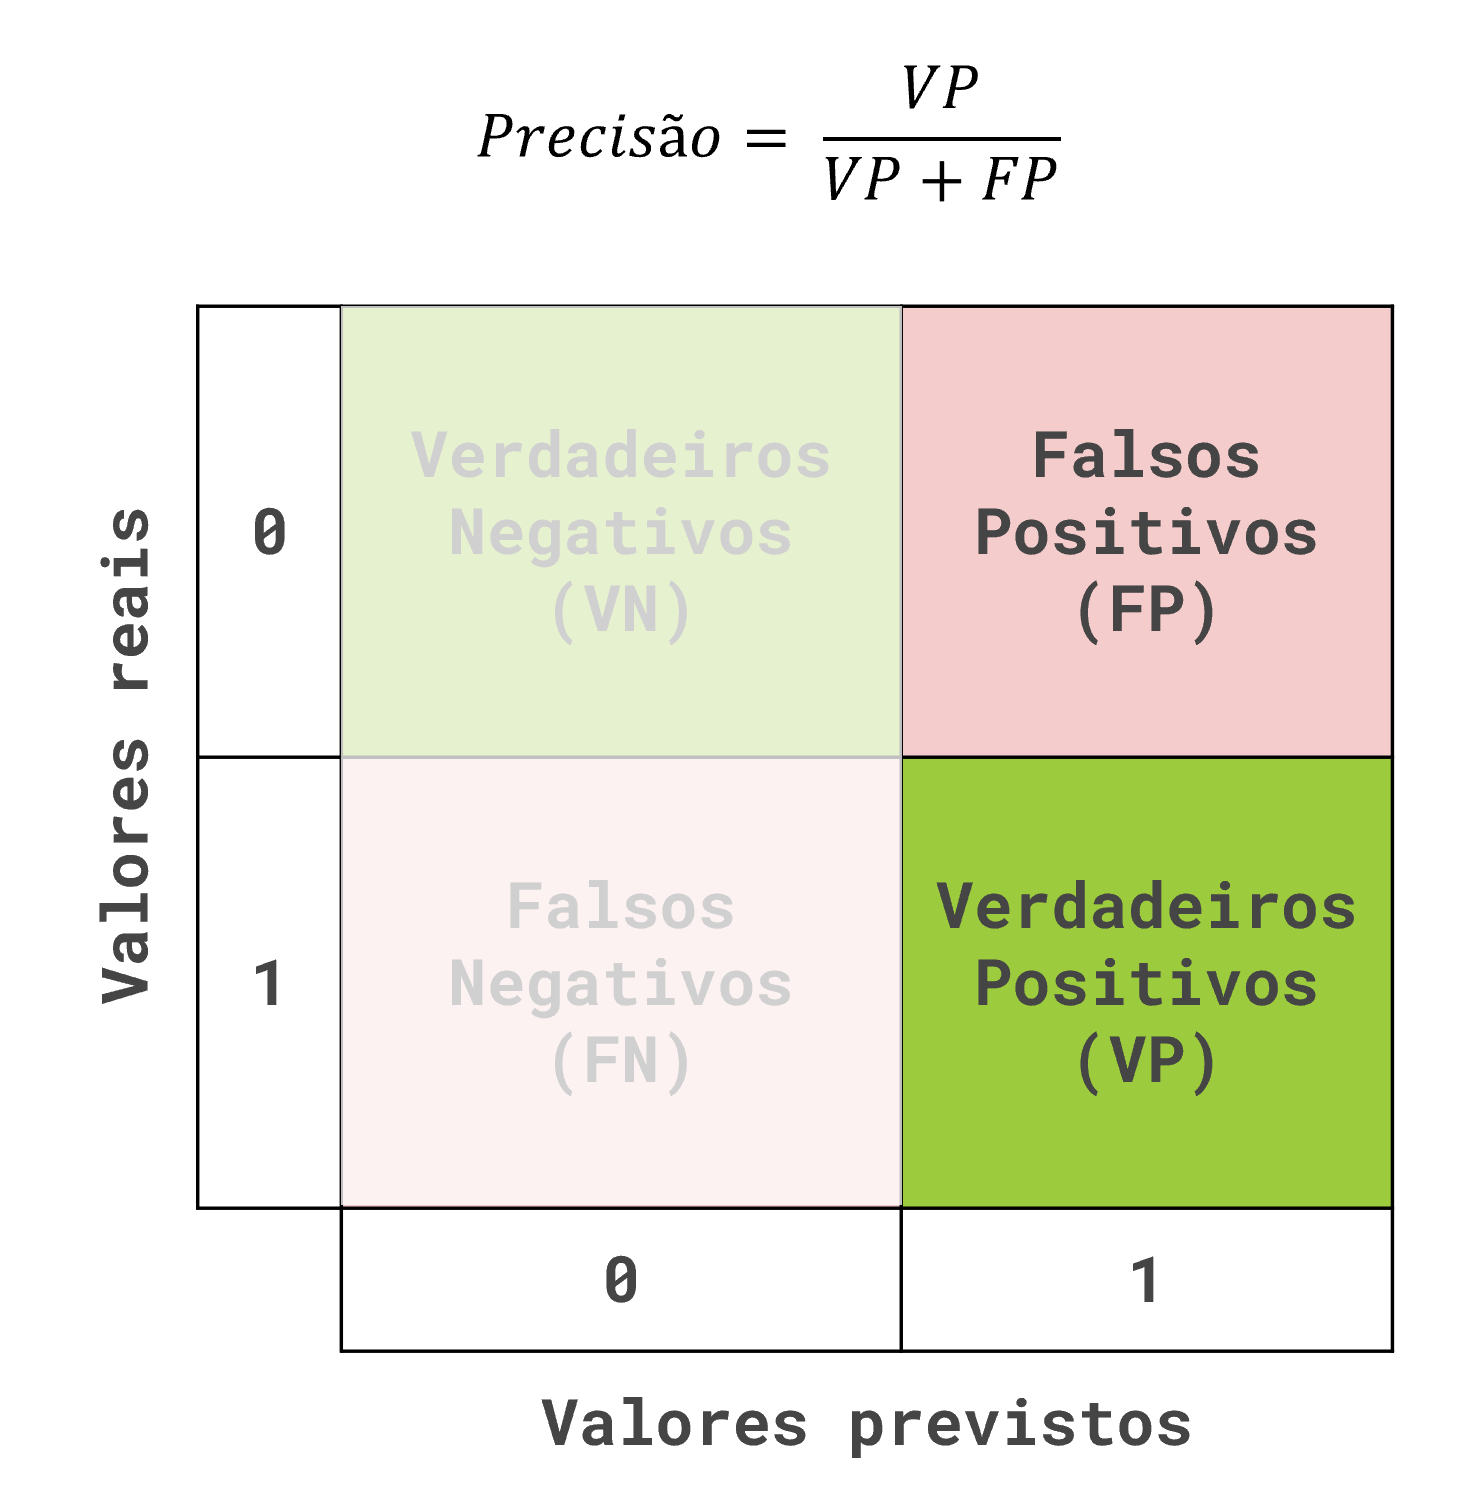

#### F1-Score


Fornece um equilíbrio entre o recall e a precisão, sendo útil quando as classes da variável alvo estão desbalanceadas, ou seja, quando há uma quantidade de dados muito diferente para cada classe. Além disso, é aplicável quando o risco ou custo de falsos positivos e de falsos negativos é alto simultaneamente. Em casos de detecção de tumores em pacientes, é preciso ter um equilíbrio entre evitar erros na detecção de tumores quando a pessoa realmente os possui e evitar erros ao informar que uma pessoa possui um tumor quando na realidade ela não possui.

O cálculo do F1-Score é feito a partir da média harmônica entre a precisão e o recall. Portanto, equivale a 2 vezes a precisão pelo recall, dividido pela soma entre a precisão e o recall:

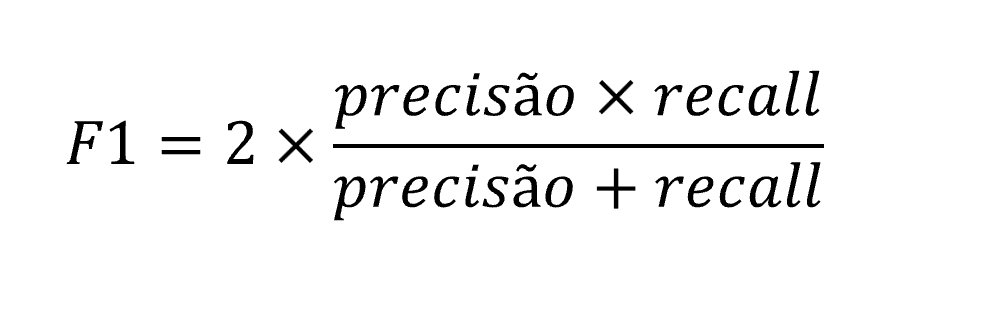

A escolha da métrica de classificação adequada depende do problema que está sendo resolvido e de cada cenário. Nos casos em que as classes estão balanceadas e possuem importância semelhante, a acurácia pode ser uma boa métrica inicial. Porém, quando as classes estão desequilibradas ou os erros têm custos diferentes, métricas como precisão, recall e f1-score são mais indicadas.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
print(f"Acurácia: {accuracy_score(y_val, y_pred)}")
print(f"Precisão: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1-score: {f1_score(y_val, y_pred)}")

Acurácia: 0.9060821599651618
Precisão: 0.1891891891891892
Recall: 0.02329450915141431
F1-score: 0.04148148148148148


### Curva ROC

In [15]:
from sklearn.metrics import RocCurveDisplay

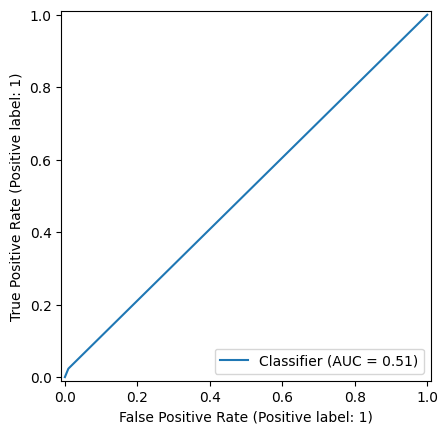

In [16]:
RocCurveDisplay.from_predictions(y_val , y_pred)


### Curva de precisão x recall

In [17]:
from sklearn.metrics import PrecisionRecallDisplay

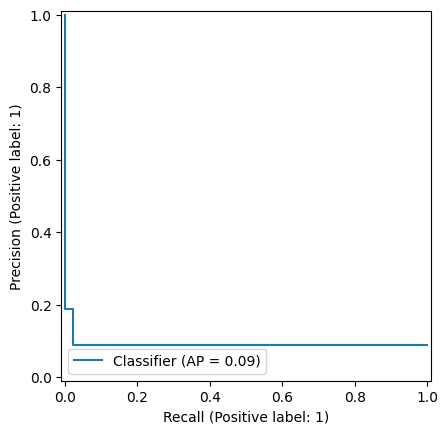

In [18]:
PrecisionRecallDisplay.from_predictions(y_val , y_pred)

### Relatório de métricas

In [19]:
print(f"Acurácia: {accuracy_score(y_val, y_pred)}")
print(f"Precisão: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1-score: {f1_score(y_val, y_pred)}")

Acurácia: 0.9060821599651618
Precisão: 0.1891891891891892
Recall: 0.02329450915141431
F1-score: 0.04148148148148148


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6288
           1       0.19      0.02      0.04       601

    accuracy                           0.91      6889
   macro avg       0.55      0.51      0.50      6889
weighted avg       0.85      0.91      0.87      6889



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

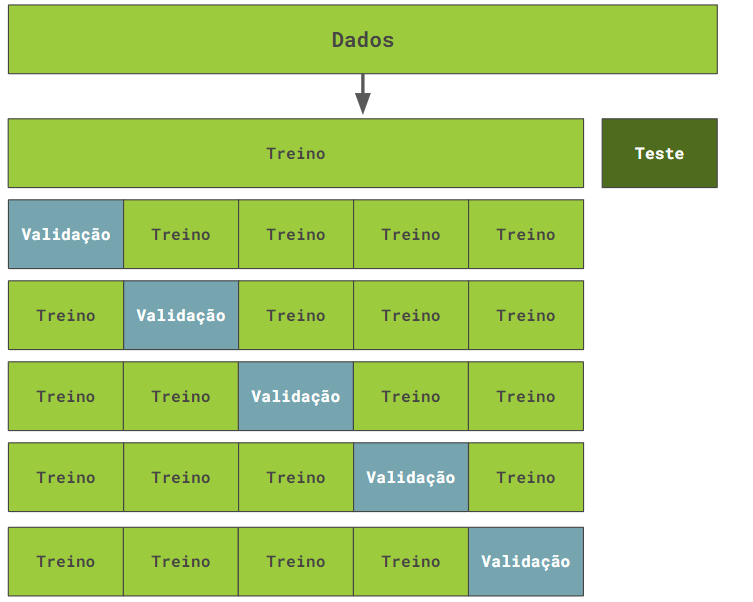

In [21]:
from sklearn.model_selection import cross_validate, KFold


In [28]:
modelo= DecisionTreeClassifier(max_depth=10,  random_state=SEED)
kf=KFold(n_splits=5, shuffle=True, random_state=SEED)
cv= cross_validate(modelo, x_treino, y_treino, cv=kf, scoring= ["accuracy", "recall", "precision", "f1"])
cv


{'fit_time': array([0.55130315, 0.54516888, 0.4994359 , 0.89342737, 0.98819423]),
 'score_time': array([0.04455185, 0.03635526, 0.02193332, 0.07291889, 0.03640985]),
 'test_accuracy': array([0.90675613, 0.90837575, 0.90502082, 0.90999537, 0.90745025]),
 'test_recall': array([0.01822917, 0.02516556, 0.02346806, 0.01478495, 0.02300406]),
 'test_precision': array([0.21212121, 0.25333333, 0.2       , 0.19642857, 0.17894737]),
 'test_f1': array([0.03357314, 0.04578313, 0.042007  , 0.0275    , 0.04076739])}

In [23]:
media = cv["test_accuracy"].mean()
desvio_padrao = cv["test_accuracy"].std()
print(f"Acurácia média: {round(media,4)} +- {round(desvio_padrao,4)}")
print(f"Acuracia média: {round(media-2*desvio_padrao,4)} - {round(media + 2*desvio_padrao,4)}")


Acurácia média: 0.9082 +- 0.0049
Acuracia média: 0.8985 - 0.9179


### Validação cruzada com recall

In [24]:
media = cv["test_recall"].mean()
desvio_padrao = cv["test_recall"].std()
print(f"Recall médio: {round(media,4)} +- {round(desvio_padrao,4)}")
print(f"Recall médio: {round(media-2*desvio_padrao,4)} - {round(media + 2*desvio_padrao,4)}")


Recall médio: 0.0209 +- 0.0039
Recall médio: 0.0131 - 0.0287


### Estratificando os dados

In [25]:
from sklearn.model_selection import StratifiedKFold
modelo= DecisionTreeClassifier(max_depth=10,  random_state=SEED)
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
scv= cross_validate(modelo, x_treino, y_treino, cv=skf, scoring= ["accuracy", "recall", "precision", "f1"])
scv

{'fit_time': array([0.4196887 , 0.53188372, 0.41300154, 0.37256885, 0.73524022]),
 'score_time': array([0.02055764, 0.02205133, 0.02266455, 0.02414966, 0.02031684]),
 'test_accuracy': array([0.903865  , 0.90657666, 0.90777439, 0.90951655, 0.90744774]),
 'test_recall': array([0.03366584, 0.02496879, 0.03117207, 0.02369077, 0.0286783 ]),
 'test_precision': array([0.2       , 0.20618557, 0.26315789, 0.28358209, 0.24468085]),
 'test_f1': array([0.05763074, 0.04454343, 0.05574136, 0.04372842, 0.05133929])}

In [26]:
def media_desvio(metrica):
  media = scv[metrica].mean()
  desvio_padrao = scv[metrica].std()
 # print(f"Recall médio: {round(media,4)} +- {round(desvio_padrao,4)}")
  print(f"{metrica}: média {round(media-2*desvio_padrao,4)} - {round(media + 2*desvio_padrao,4)}")


#Resumo Modelo + Validação


In [27]:
#separaçaõ x (features) e y (target)
x=data.drop('inadimplente',axis=1)
y=data['inadimplente']

#separação treino e teste
from sklearn.model_selection import train_test_split
SEED=5
x_treino , x_teste , y_treino , y_teste  = train_test_split(x,y, test_size=0.2 , stratify=y, random_state=5)

#treino + validação cruzada do Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
modelo= DecisionTreeClassifier(max_depth=10,  random_state=SEED)
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
scv= cross_validate(modelo, x_treino, y_treino, cv=skf, scoring= ["accuracy", "recall", "precision", "f1"])

#exibir metricas do Decision Tree
print("\nDecision Tree")
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

#Random Forest
from sklearn.ensemble import RandomForestClassifier
modelo= RandomForestClassifier(n_estimators=100, max_depth=10,  random_state=SEED)
rfc=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
rfcv= cross_validate(modelo, x_treino, y_treino, cv=skf, scoring= ["accuracy", "recall", "precision", "f1"])
def media_desvio2(metrica2):
  media = rfcv[metrica2].mean()
  desvio_padrao = rfcv[metrica2].std()
  print(f"{metrica2}: média {round(media-2*desvio_padrao,4)} - {round(media + 2*desvio_padrao,4)}")

#exibir metricas do Decision Tree
print("\nRandom Forest")
media_desvio2("test_accuracy")
media_desvio2("test_recall")
media_desvio2("test_precision")
media_desvio2("test_f1")

#KNEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

modelo_knn = KNeighborsClassifier(n_neighbors=5)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

knn_cv = cross_validate(modelo_knn, x_treino, y_treino, cv=skf,
                        scoring=["accuracy", "recall", "precision", "f1"])

def media_desvio_knn(metrica):
    media = knn_cv[metrica].mean()
    desvio_padrao = knn_cv[metrica].std()
    print(f"{metrica}: média {round(media - 2 * desvio_padrao, 4)} - {round(media + 2 * desvio_padrao, 4)}")

print("\nK-Nearest Neighbors")
media_desvio_knn("test_accuracy")
media_desvio_knn("test_recall")
media_desvio_knn("test_precision")
media_desvio_knn("test_f1")



Decision Tree
test_accuracy: média 0.9056 - 0.9087
test_recall: média 0.0071 - 0.0348
test_precision: média 0.1164 - 0.271
test_f1: média 0.0137 - 0.0617

Random Forest
test_accuracy: média 0.9124 - 0.9128
test_recall: média -0.0016 - 0.0042
test_precision: média -0.2039 - 0.7106
test_f1: média -0.0031 - 0.0084

K-Nearest Neighbors
test_accuracy: média 0.9028 - 0.9081
test_recall: média 0.006 - 0.0189
test_precision: média 0.0581 - 0.1756
test_f1: média 0.0111 - 0.0338
